Lets look inside data files:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

store_data = pd.read_csv('store.csv')
train_data = pd.read_csv('train.csv', low_memory=False)

print("Store data:\n")
print(store_data)

print("\nTrain data:\n")
print(train_data)

Store data:

      Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                         

• Task 1: Find the store that has the maximum sale recorded. Print the store id, date and
the sales on that day

In [ ]:
max_sales_store = train_data['Sales'].max()
rows_with_max_sales = train_data[train_data['Sales'] == max_sales_store]

print(rows_with_max_sales[['Store', 'Date', 'Sales']])

       Store        Date  Sales
44393    909  2015-06-22  41551


Task 2: Find the store(s) that has/ve the least possible and maximum possible competition distance(s).

In [ ]:
max_dist_store = store_data['CompetitionDistance'].max()
rows_with_max_dist = store_data[store_data['CompetitionDistance'] == max_dist_store]

min_dist_store = store_data['CompetitionDistance'].min()
rows_with_min_dist = store_data[store_data['CompetitionDistance'] == min_dist_store]

print("Stores with max competition distance:\n")
print(rows_with_max_dist)
print('\n\n')
print("Stores with min competition distance:\n")
print(rows_with_min_dist)

Stores with max competition distance:

     Store StoreType Assortment  CompetitionDistance  \
452    453         a          c              75860.0   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
452                        NaN                       NaN       0   

     Promo2SinceWeek  Promo2SinceYear PromoInterval  
452              NaN              NaN           NaN  



Stores with min competition distance:

     Store StoreType Assortment  CompetitionDistance  \
515    516         a          c                 20.0   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
515                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear     PromoInterval  
515             35.0           2010.0  Mar,Jun,Sept,Dec  


Task 3: Check if there are any missing values in the dataset and output the number of
missing values per each column.

In [ ]:
missing_values = store_data.isna().sum()
print(missing_values)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


Task 4: Plot the monthly mean of sales across all stores using matplotlib.

       Store  Year  Month        Sales
0          1  2013      1  4142.935484
1          1  2013      2  4473.964286
2          1  2013      3  4682.870968
3          1  2013      4  3933.633333
4          1  2013      5  3813.709677
...      ...   ...    ...          ...
33480   1115  2015      3  6033.580645
33481   1115  2015      4  5786.666667
33482   1115  2015      5  5619.677419
33483   1115  2015      6  6084.766667
33484   1115  2015      7  6115.709677

[33485 rows x 4 columns]



Histogram:



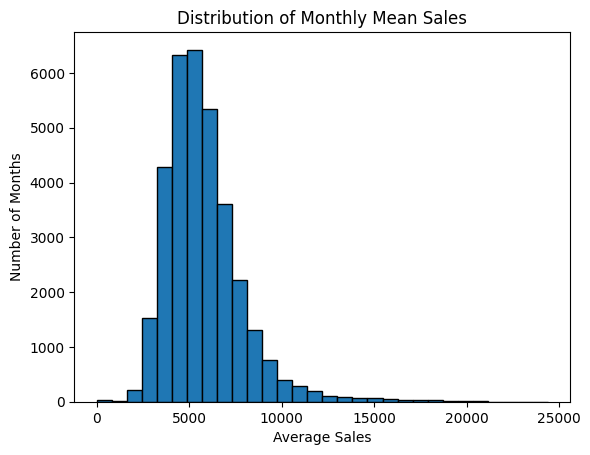

Boxplot:



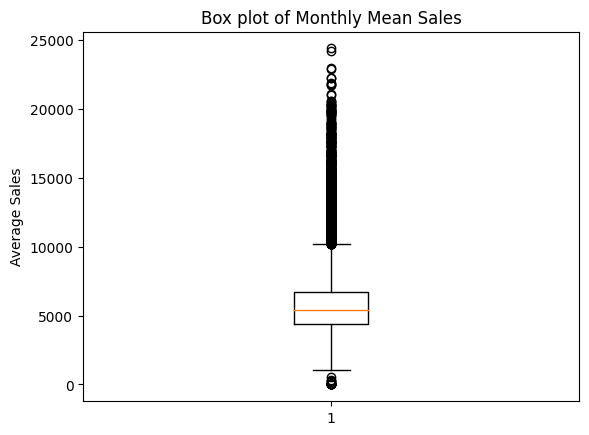

Aggregated Line Plot:



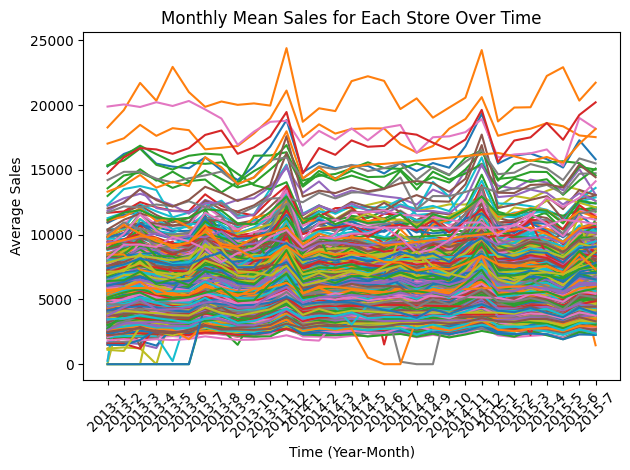

Bar Plot:



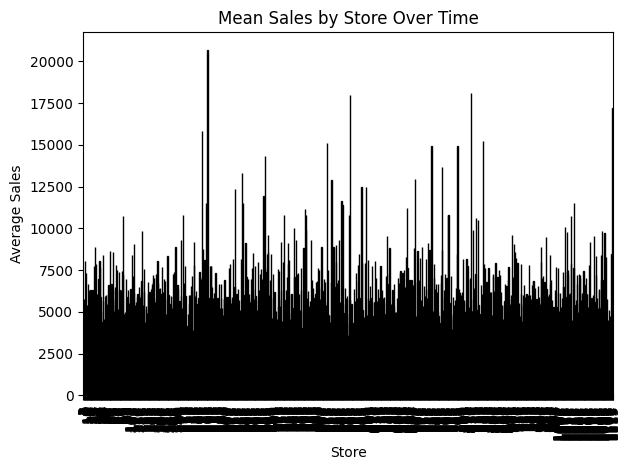

Heatmap:



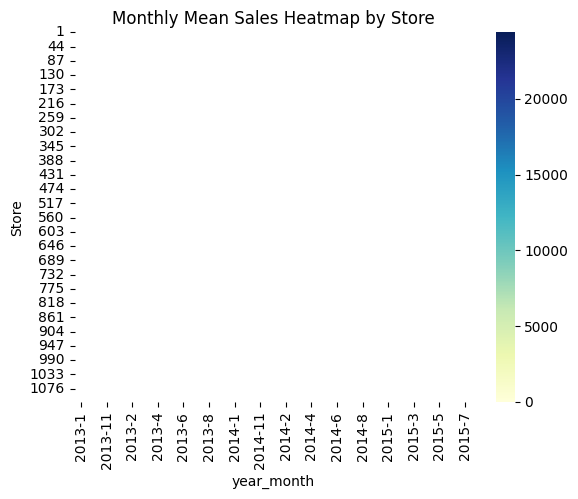

Area Plot:



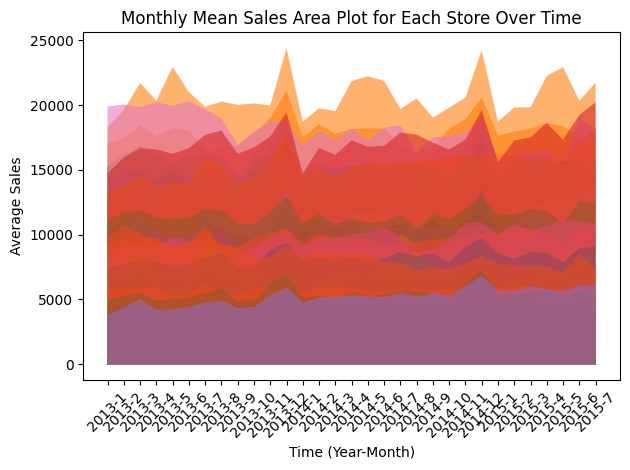

In [ ]:
import seaborn as sns

train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month

monthly_mean = train_data.groupby(['Store', 'Year', 'Month'])['Sales'].mean().reset_index()

print(monthly_mean)
print('\n\n')
monthly_mean['year_month'] = monthly_mean['Year'].astype(str) + '-' + monthly_mean['Month'].astype(str)

### Several diagrams that can visualize data
print("Histogram:\n")
plt.hist(monthly_mean['Sales'], bins=30, edgecolor='black')
plt.xlabel('Average Sales')
plt.ylabel('Number of Months')
plt.title('Distribution of Monthly Mean Sales')
plt.show()

print("Boxplot:\n")
plt.boxplot(monthly_mean['Sales'])
plt.title('Box plot of Monthly Mean Sales')
plt.ylabel('Average Sales')
plt.show()

print("Aggregated Line Plot:\n")
for store in monthly_mean['Store'].unique():
    store_data = monthly_mean[monthly_mean['Store'] == store]
    plt.plot(store_data['year_month'], store_data['Sales'], label=f'Store {store}')

plt.xticks(rotation=45)
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Sales')
plt.title('Monthly Mean Sales for Each Store Over Time')
plt.tight_layout()
plt.show()

print("Bar Plot:\n")
store_means = monthly_mean.groupby('Store')['Sales'].mean()
store_means.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.title('Mean Sales by Store Over Time')
plt.tight_layout()
plt.show()

print("Heatmap:\n")
heatmap_data = monthly_mean.pivot_table(values='Sales', index='Store', columns='year_month', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Monthly Mean Sales Heatmap by Store')
plt.show()

print("Area Plot:\n")
for store in monthly_mean['Store'].unique():
    store_data = monthly_mean[monthly_mean['Store'] == store]
    plt.fill_between(store_data['year_month'], store_data['Sales'], label=f'Store {store}', alpha=0.6)

plt.xticks(rotation=45)
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Sales')
plt.title('Monthly Mean Sales Area Plot for Each Store Over Time')
plt.tight_layout()
plt.show()




As you can see with the massive amount of data that should be displayed, diagrams become very messy and cluttered, but still provide some insides at least about average data distribution. And now we can show more specific data, for example top 5 and bottom 5 Stores, to understand data peaks.

Bar plot:



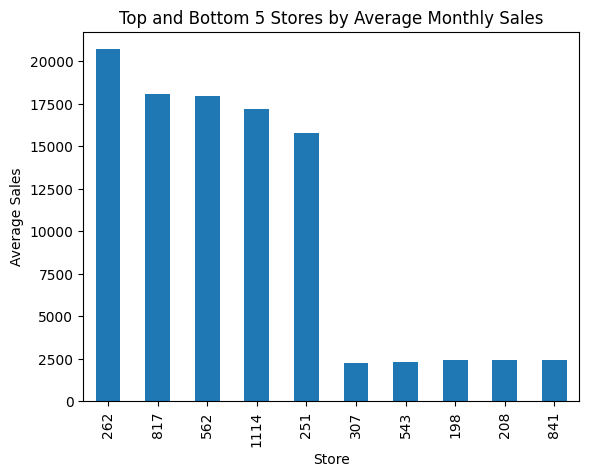

Heatmap:



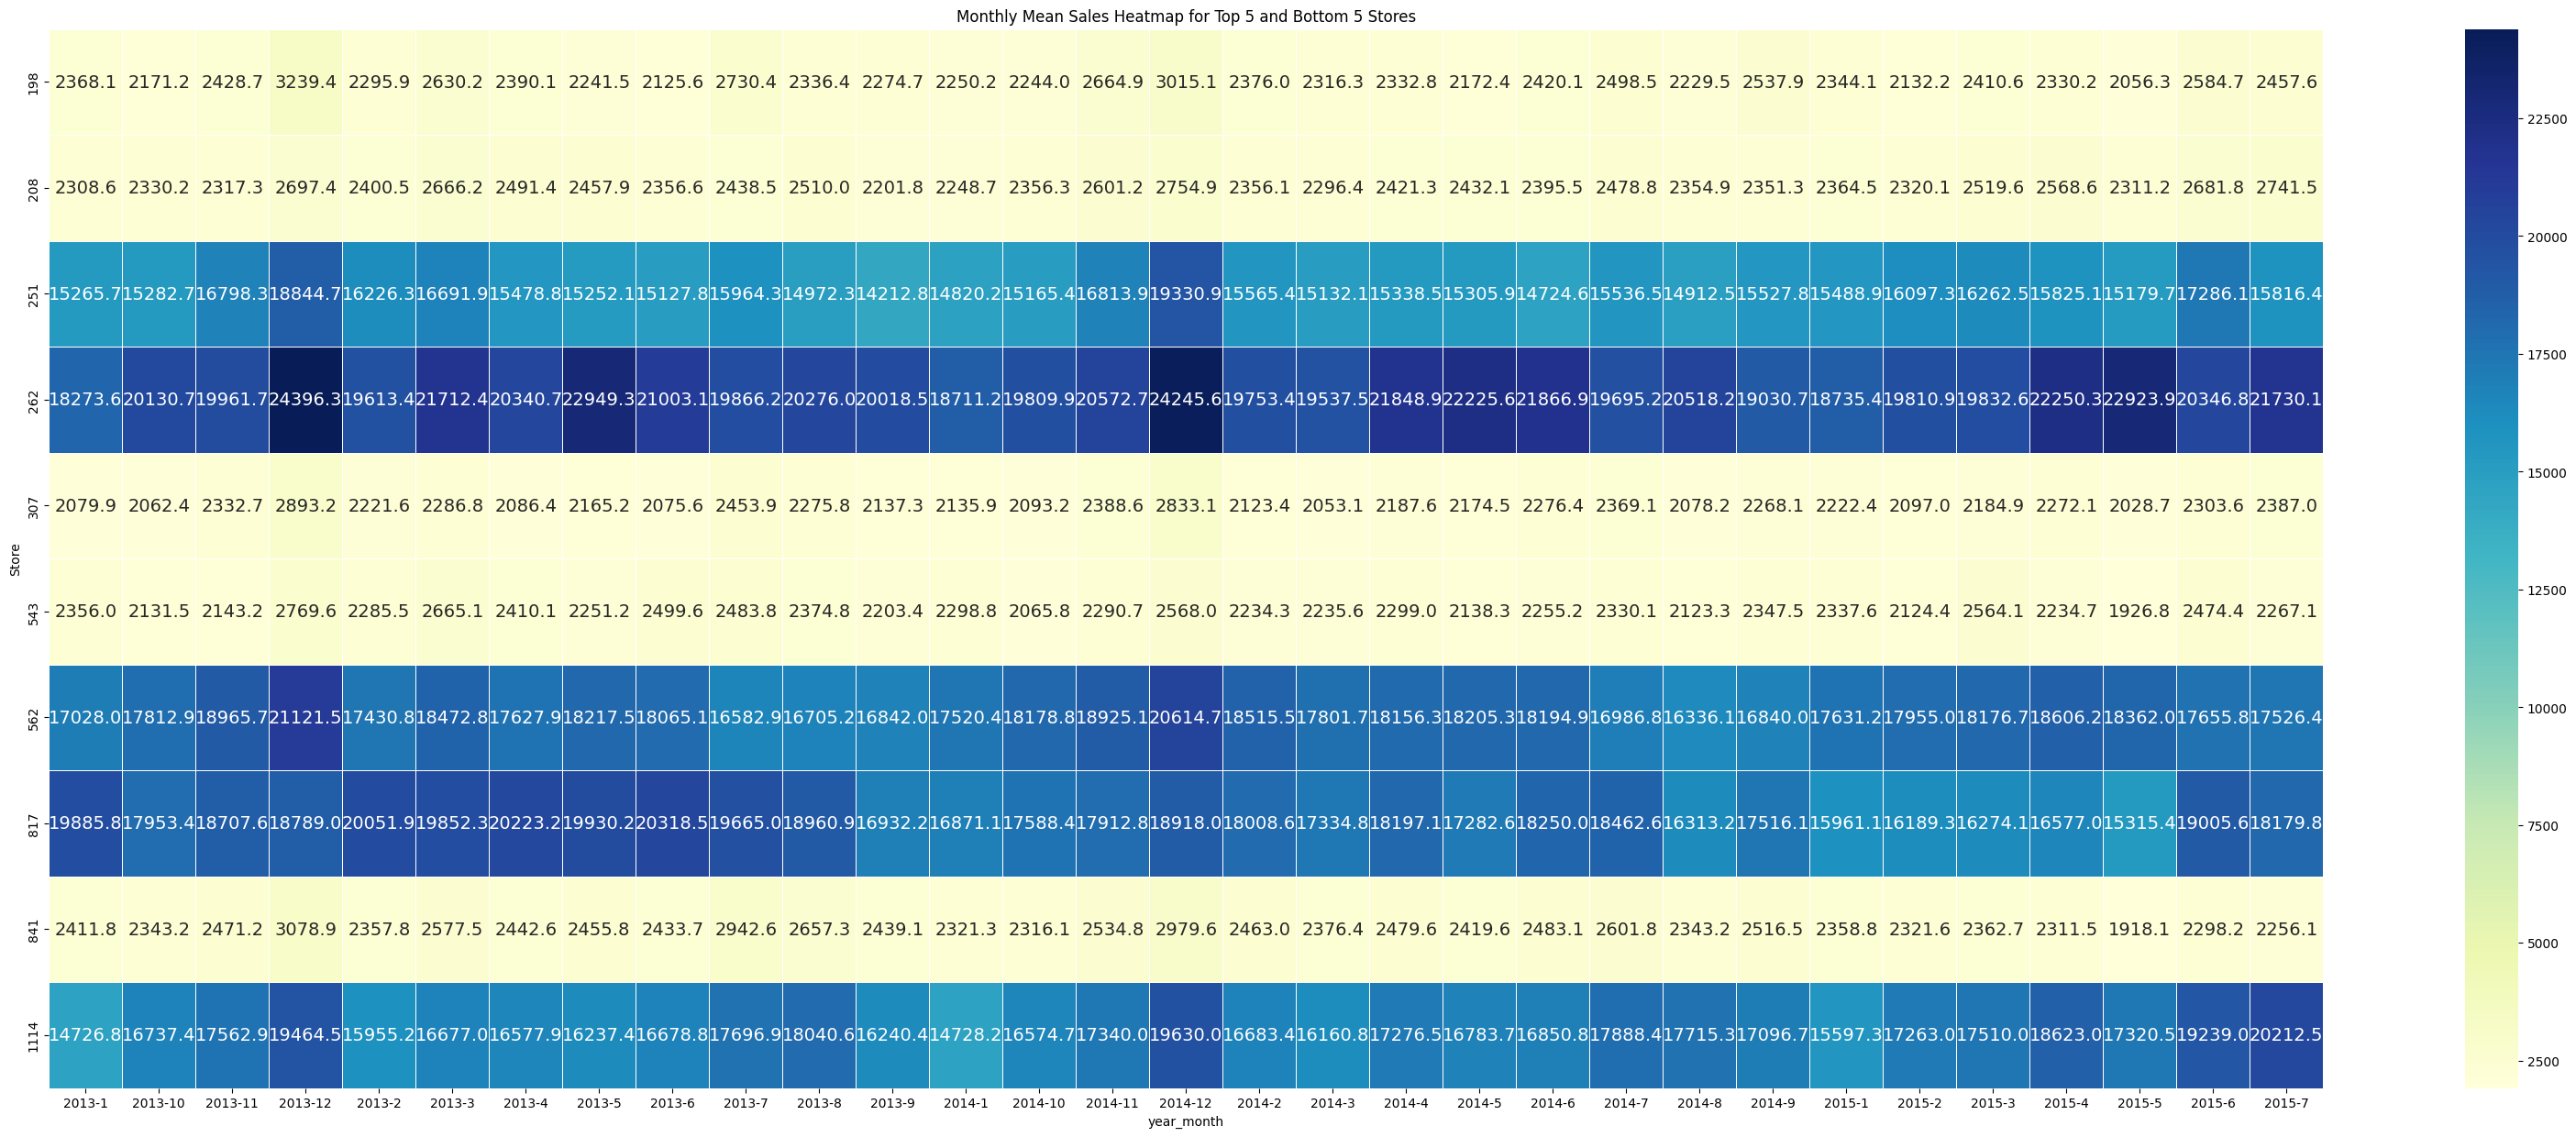

In [ ]:
print("Bar plot:\n")

top_5 = store_means.sort_values(ascending=False).head(5)
bottom_5 = store_means.sort_values().head(5)
combined_means = pd.concat([top_5, bottom_5])
combined_means.plot(kind='bar')
plt.title('Top and Bottom 5 Stores by Average Monthly Sales')
plt.ylabel('Average Sales')
plt.show()

print("Heatmap:\n")
top_5_stores = store_means.nlargest(5).index
bottom_5_stores = store_means.nsmallest(5).index
selected_stores = monthly_mean[monthly_mean['Store'].isin(top_5_stores) | monthly_mean['Store'].isin(bottom_5_stores)]
heatmap_data = selected_stores.pivot_table(values='Sales', index='Store', columns='year_month', aggfunc='mean')

plt.figure(figsize=(40, 15))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".1f", annot_kws={"size": 14})
plt.title('Monthly Mean Sales Heatmap for Top 5 and Bottom 5 Stores')
plt.show()

• Task 5: Which store type (’a’,’b’ etc.) has had the most sales?

In [ ]:

store_data = pd.read_csv('store.csv')
train_data = pd.read_csv('train.csv', low_memory=False)

merged_data = pd.merge(train_data, store_data, on='Store', how='left')
store_sales_by_type = merged_data.groupby(['StoreType', 'Store'])['Sales'].sum()
max_sales_by_type = store_sales_by_type.groupby('StoreType').max()

def stores_with_max_sales(type_value):
    return store_sales_by_type[type_value][store_sales_by_type[type_value] == max_sales_by_type[type_value]].index.tolist()

result = max_sales_by_type.index.to_series().apply(stores_with_max_sales)

print(result)



StoreType
a    17057867
b    19516842
c    12175995
d    11553523
Name: Sales, dtype: int64
StoreType
a    [817]
b    [262]
c    [523]
d    [842]
Name: StoreType, dtype: object


• Task 6: What is the difference in the mean of sales (across all stores) when offering a
Promo and not? Plot this data with matplotlib.

Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64


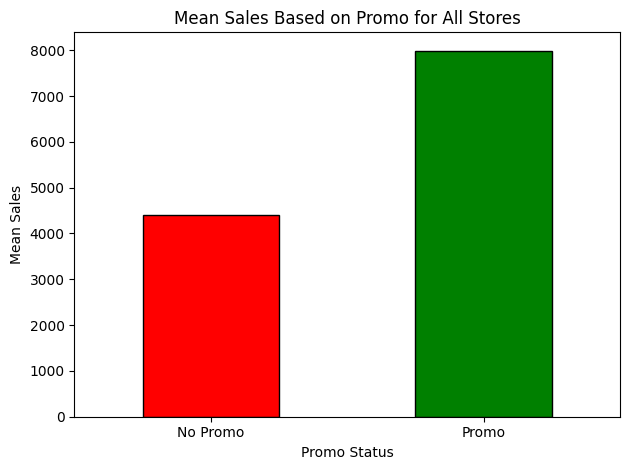

In [8]:
mean_sales_by_promo = train_data.groupby('Promo')['Sales'].mean()

print(mean_sales_by_promo)

mean_sales_by_promo.plot(kind='bar', color=['red', 'green'], edgecolor='black')
plt.title('Mean Sales Based on Promo for All Stores')
plt.xlabel('Promo Status')
plt.ylabel('Mean Sales')
plt.xticks(ticks=[0, 1], labels=['No Promo', 'Promo'], rotation=0)
plt.tight_layout()
plt.show()

• Task 7: For the store with id 1, plot the mean sales per each day of week in a pie chart
by using matplotlib.

Day_of_Week
Friday       4462.051852
Monday       5790.522388
Saturday     2873.104478
Sunday          0.000000
Thursday     4673.103704
Tuesday      5329.429630
Wednesday    5705.281481
Name: Sales, dtype: float64


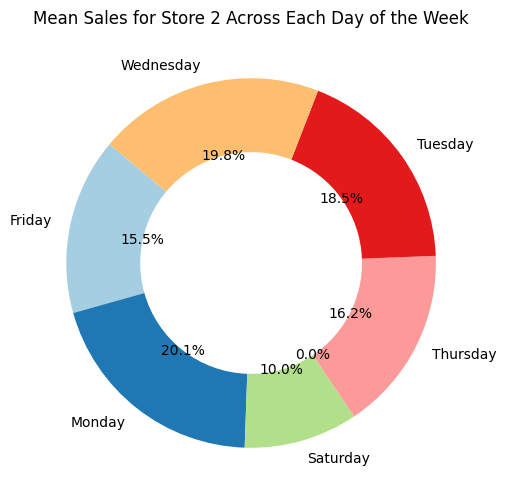

In [14]:
second_store_data = train_data[train_data['Store'] == 2].copy()
second_store_data['Date'] = pd.to_datetime(second_store_data['Date'])
second_store_data['Day_of_Week'] = second_store_data['Date'].dt.day_name()
mean_sales_by_day = second_store_data.groupby('Day_of_Week')['Sales'].mean()
print(mean_sales_by_day)

colors = plt.cm.Paired(range(len(mean_sales_by_day)))
mean_sales_by_day.plot(kind='pie', figsize=(10, 6), colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Mean Sales for Store 2 Across Each Day of the Week')
plt.ylabel('')
plt.show()


• Task 8: Plot the mean of sales across all the stores for each day of the week recorded in
the dataset, by using matplotlib.

Day_of_Week
Friday       6723.274305
Monday       7809.044510
Saturday     5847.562599
Sunday        204.183189
Thursday     6247.575913
Tuesday      7005.244467
Wednesday    6555.884138
Name: Sales, dtype: float64


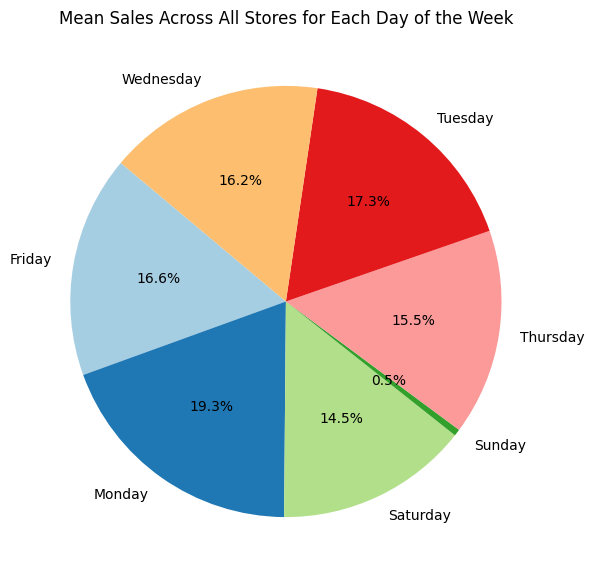

In [13]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Day_of_Week'] = train_data['Date'].dt.day_name()
mean_sales_by_day = train_data.groupby('Day_of_Week')['Sales'].mean()
print(mean_sales_by_day)

colors = plt.cm.Paired(range(7))
mean_sales_by_day.plot(kind='pie', figsize=(10, 7), colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Mean Sales Across All Stores for Each Day of the Week')
plt.ylabel('')
plt.show()


• Task 9: For the first 10 stores (first 10 ids), draw boxplots of their sales by using
matplotlib.

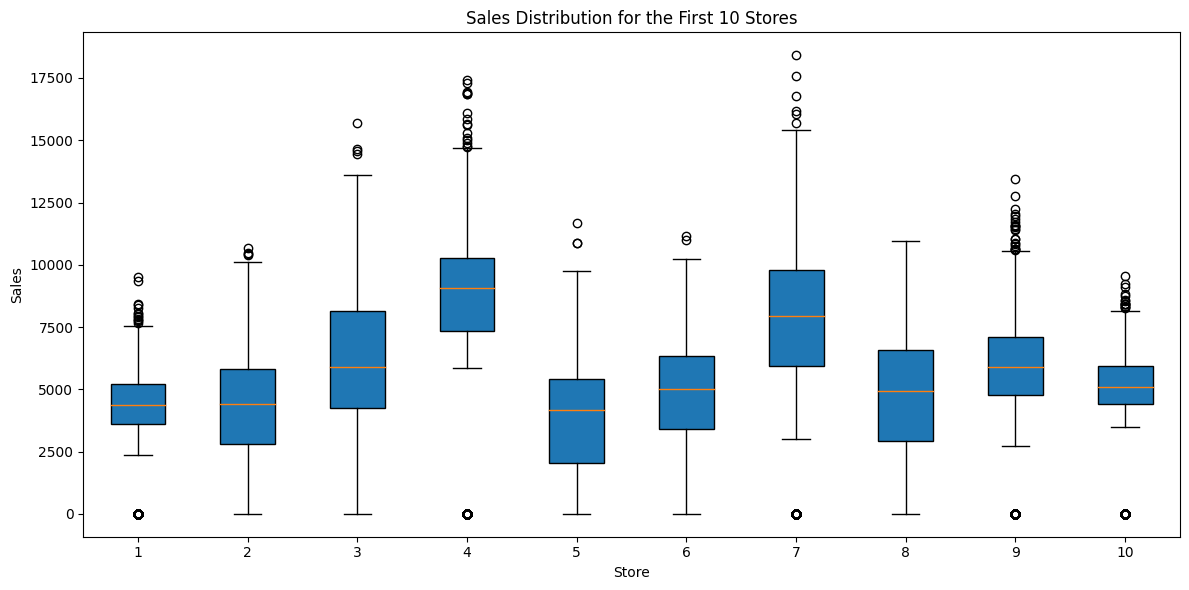

In [20]:
stores_to_consider = list(range(1, 11))
filtered_data = train_data[train_data['Store'].isin(stores_to_consider)]
data_for_boxplots = [filtered_data[filtered_data['Store'] == store]['Sales'].values for store in stores_to_consider]

plt.figure(figsize=(12, 6))
plt.boxplot(data_for_boxplots, vert=True, patch_artist=True)
plt.title('Sales Distribution for the First 10 Stores')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.xticks(ticks=range(1, 11), labels=[str(store) for store in stores_to_consider])
plt.tight_layout()
plt.show()
